# Обучение без учителя

## Задание 1

Импортируйте библиотеки **pandas**, **numpy** и **matplotlib**. <br>
Загрузите **"Boston House Prices dataset"** из встроенных наборов данных библиотеки **sklearn**.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn.datasets import load_boston

Создайте датафреймы **X** и **y** из этих данных.

In [2]:
boston = load_boston()

X = pd.DataFrame(boston['data'], columns=boston['feature_names'])
y = pd.DataFrame(boston['target'], columns=['price'])

Разбейте эти датафреймы на тренировочные **(X_train, y_train)** и тестовые **(X_test, y_test)** с помощью функции **train_test_split** так, чтобы размер тестовой выборки составлял _20%_ от всех данных, при этом аргумент random_state должен быть равен _42_.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=42)

Масштабируйте данные с помощью **StandardScaler**.

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=boston['feature_names'])
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=boston['feature_names'])

Постройте модель **TSNE** на тренировочный данных с параметрами: **n_components=2, learning_rate=250, random_state=42**.

In [5]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print(f'До:\t{X_train_scaled.shape}')
print(f'После:\t{X_train_tsne.shape}')

До:	(404, 13)
После:	(404, 2)


Постройте диаграмму рассеяния на этих данных.

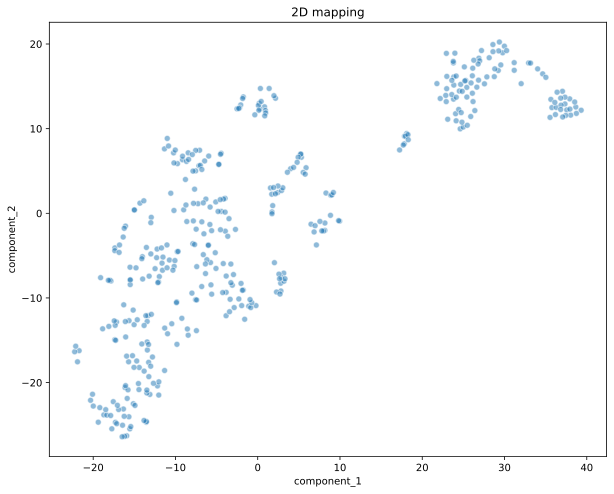

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1)

fig.set_size_inches(10, 8)

ax.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], alpha=0.5, ec='white')
ax.set_xlabel('component_1')
ax.set_ylabel('component_2')
ax.set_title('2D mapping')
plt.show()

Можно воспользоваться функцией из вебинара и построить диаграму рассеяния с учетом соответсвующих значений целевой переменной.

In [7]:
def display_components_in_2D_space(components_df, labels=None):
    components_with_labels_df = pd.concat([components_df, pd.DataFrame(labels)], axis=1)

    if labels is not None:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', 
                                         c=components_with_labels_df.iloc[:, -1], cmap=plt.get_cmap('turbo'),
                                         alpha=0.5, figsize=(12,10), sharex=False)
    else:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', alpha=0.5, figsize=(12,10))

    plt.xlabel('component_1')
    plt.ylabel('component_2')
    plt.title('2D mapping of objects')    
    plt.show()

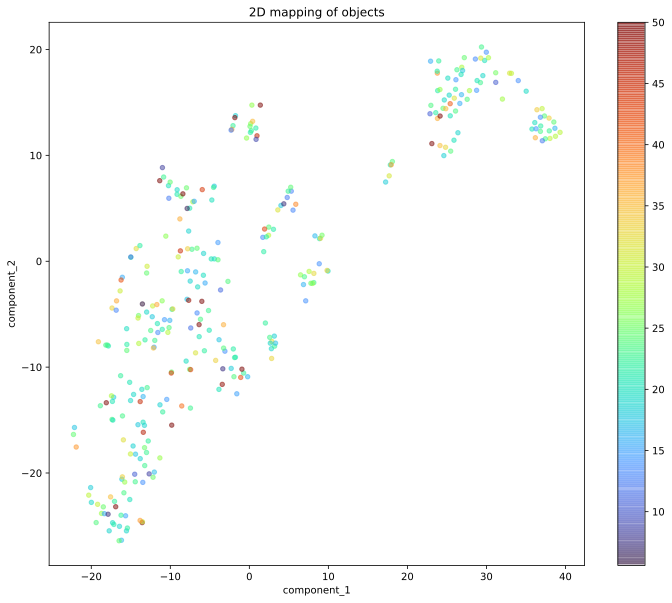

In [8]:
df = pd.DataFrame(X_train_tsne, columns=['component_1', 'component_2'])
display_components_in_2D_space(df, y_train)

## Задание 2

С помощью **KMeans** разбейте данные из тренировочного набора на _3_ кластера, используйте все признаки из датафрейма **X_train**. <br>
Параметр **max_iter** должен быть равен _100_, **random_state** сделайте равным _42_.

In [9]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, max_iter=100, random_state=42)
train_labels = pd.DataFrame(model.fit_predict(X_train_scaled), columns=['clusters'])
train_labels.head()

,clusters
0,1
1,0
2,2
3,1
4,0


Постройте еще раз диаграмму рассеяния на данных, полученных с помощью **TSNE**, и раскрасьте точки из разных кластеров разными цветами.

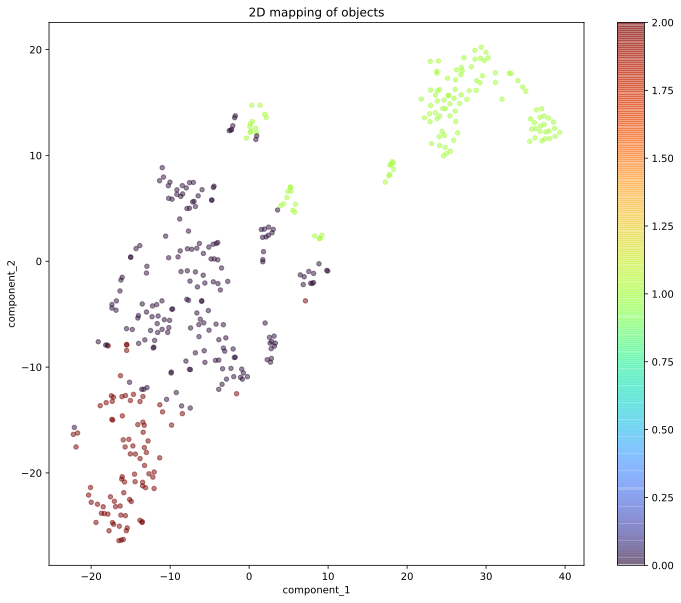

In [10]:
display_components_in_2D_space(df, train_labels)

Вычислите средние значения **price** и **CRIM** в разных кластерах.

In [11]:
df_crim = pd.concat([pd.DataFrame(X_train['CRIM'].values, columns=['CRIM']), train_labels], axis=1)
df_crim.groupby(['clusters']).mean()

,CRIM
clusters,
0,0.421660
1,10.797028
2,0.073566


In [12]:
df_price = pd.concat([pd.DataFrame(y_train.values, columns=['price']), train_labels], axis=1)
df_price.groupby(['clusters']).mean()

,price
clusters,
0,24.958115
1,16.165354
2,27.788372


## *Задание 3

Примените модель **KMeans**, построенную в предыдущем задании, к данным из тестового набора.

In [13]:
test_labels = pd.DataFrame(model.predict(X_test_scaled), columns=['clusters'])
test_labels.head()

,clusters
0,0
1,2
2,1
3,0
4,1


Вычислите средние значения **price** и **CRIM** в разных кластерах на тестовых данных.

In [14]:
df_crim_test = pd.concat([pd.DataFrame(X_test['CRIM'].values, columns=['CRIM']), test_labels], axis=1)
df_crim_test.groupby(['clusters']).mean()

,CRIM
clusters,
0,0.266079
1,10.165531
2,0.062060


In [15]:
df_price_test = pd.concat([pd.DataFrame(y_test.values, columns=['price']), test_labels], axis=1)
df_price_test.groupby(['clusters']).mean()

,price
clusters,
0,21.860784
1,16.437143
2,31.350000
